<img src="https://rhyme.com/assets/img/logo-dark.png" align="center"> 

<h2 align="center">Simple Linear Regression</h2>

Linear Regression is a useful tool for predicting a quantitative response.

We have an input vector $X^T = (X_1, X_2,...,X_p)$, and want to predict a real-valued output $Y$. The linear regression model has the form

<h4 align="center"> $f(x) = \beta_0 + \sum_{j=1}^p X_j \beta_j$. </h4>

The linear model either assumes that the regression function $E(Y|X)$ is linear, or that the linear model is a reasonable approximation.Here the $\beta_j$'s are unknown parameters or coefficients, and the variables $X_j$ can come from different sources. No matter the source of $X_j$, the model is linear in the parameters.

### Loading the Data and Importing Libraries
---

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

The adverstiting dataset captures sales revenue generated with respect to advertisement spends across multiple channles like radio, tv and newspaper. [Source](http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv)

In [2]:
df = pd.read_csv('Advertising.csv', index_col=0)
df.head(3)

TV  radio  newspaper  sales
1  230.1   37.8       69.2   22.1
2   44.5   39.3       45.1   10.4
3   17.2   45.9       69.3    9.3

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 7.8 KB


### Exploratory Data Analysis

<Figure size 864x576 with 0 Axes>

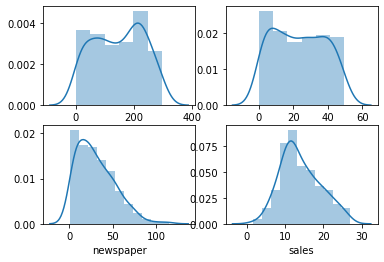

In [4]:
plt.figure(figsize=(12,8))
fig, axes = plt.subplots(nrows=2, ncols=2)

for i, column in enumerate(df.columns):
    sns.distplot(df[column],ax=axes[i//2, i%2])

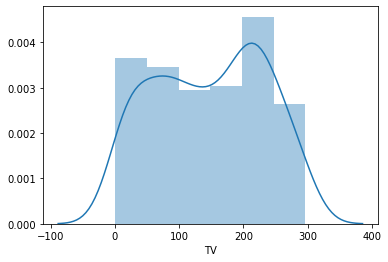

In [5]:
sns.distplot(df.TV)

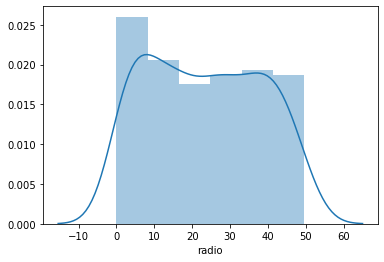

In [6]:
sns.distplot(df.radio)

The spendings on radio and TV seems to be uniformly distributed. And spendins on Tv are comparatibly higher from radia according to the y axis.

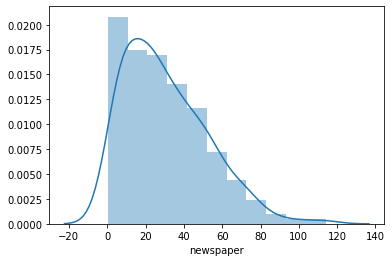

In [7]:
sns.distplot(df.newspaper)

From the graph we can say that, spending on newspaper advertisements are skewed to the right. And most of the spendings for newspaper ads are fairly low.

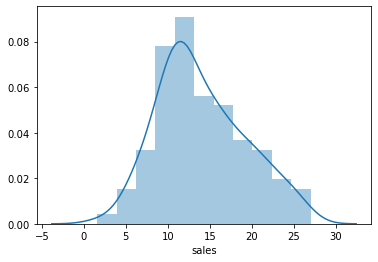

In [8]:
sns.distplot(df.sales)

Sales are seems to be normally distributed.

### Exploring Relationships between Predictors and Response

Let's investigate all three features to find the most corrolated predictor for our response or target variable

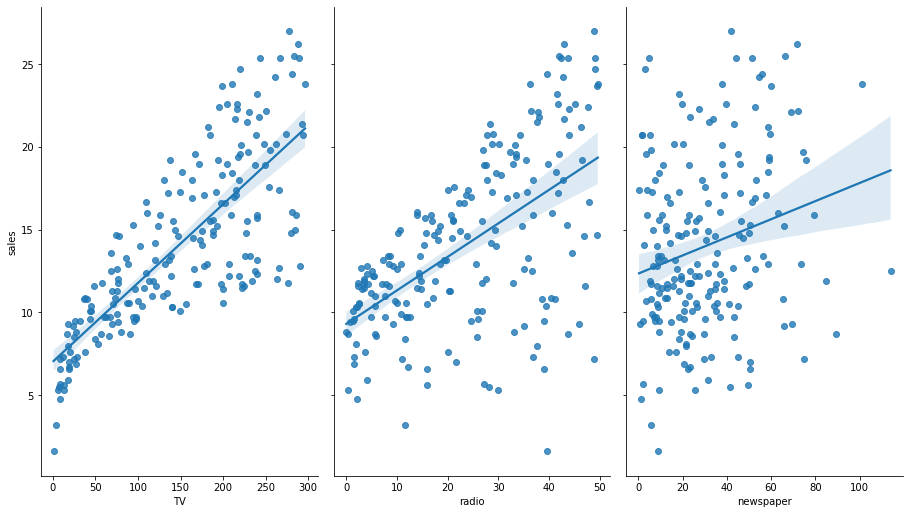

In [9]:
sns.pairplot(df, x_vars=['TV', 'radio', 'newspaper'], y_vars='sales', height=7, aspect=0.6, kind='reg')

There is strong relationship between our TV ads and sales. Radio ads are also looks good, but newspaper ads has the weakest correlation with our sales.

In [11]:
# correlation between TV ads and our sales
df.TV.corr(df.sales)

0.7822244248616066

In [12]:
# pairwise correlation
df.corr()

TV     radio  newspaper     sales
TV         1.000000  0.054809   0.056648  0.782224
radio      0.054809  1.000000   0.354104  0.576223
newspaper  0.056648  0.354104   1.000000  0.228299
sales      0.782224  0.576223   0.228299  1.000000

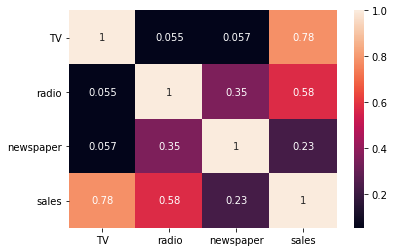

In [16]:
sns.heatmap(df.corr(), annot=True)

### Creating the Simple Linear Regression Model

General linear regression model:
$y=\beta_{0}+\beta_{1}x_{1}+\beta_{2}x_{2}+...+\beta_{n}x_{n}$

- $y$  is the response
- $\beta_{0}$ is the intercept
- $\beta_{1}$ is the coefficient for  x1  (the first feature)
- $\beta_{n}$ is the coefficient for  xn  (the nth feature)

In our case: $y=\beta_{0}+\beta_{1}×TV+\beta_{2}×Radio+\beta_{3}×Newspaper$

The $\beta$ values are called the **model coefficients*:

- These values are "learned" during the model fitting step using the "least squares" criterion
- The fitted model is then used to make predictions

In [18]:
from sklearn.model_selection import train_test_split

X = df[['TV']]
y = df.sales

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=59)

In [19]:
from sklearn.linear_model import LinearRegression

linreg = LinearRegression()

linreg.fit(X_train, y_train)

LinearRegression()

### Interpreting Model Coefficients

In [23]:
print(linreg.intercept_)
print(linreg.coef_[0])

7.038189081129282
0.04663245383465736


### Making Predictions with our Model

In [24]:
y_pred = linreg.predict(X_test)
y_pred[:10]

array([ 7.84026729, 20.54761096, 13.90714953, 19.48439101, 11.52423114,
       18.23464125, 16.8123514 , 11.43096623,  8.37187726, 17.28800243])

### Model Evaluation Metrics

In [33]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error


**Mean Absolute Error** (MAE) is the mean of the absolute value of the errors:;
$$ \frac{1}{n} \sum_{i=1}^{n} \left |y_i - \hat{y}_i \right |$$

In [30]:
mae = mean_absolute_error(y_test, y_pred)
mae

2.5356798386053025

**Mean Squared Error** (MSE) is the mean of the squared errors:
$$\frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2$$

In [32]:
mse = mean_squared_error(y_test, y_pred)
mse

10.710996077349732

**Root Mean Squared Error** (RMSE) is the square root of the mean of the squared errors:
$$\sqrt{\frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2}$$

In [35]:
rmse = np.sqrt(mse)
rmse

3.272765814620675

In [ ]:
# score of the model
r2_score = r2_score(y_test, y_pred)
r2_score